In [1]:
import numpy as np
import pandas as pd
import pynwb
from matplotlib import pyplot as plt
from utils import make_psth
%matplotlib inline

In [2]:
# Load NWB
nwb_path = '/data/742903_2024-10-22.nwb'
nwb = pynwb.NWBHDF5IO(nwb_path).read()

In [3]:
# Get trials and units table
trials = nwb.trials.to_dataframe()
units = nwb.units.to_dataframe()

In [4]:
# Unit ids of example units
example_units = ['742903_2024-10-22_F-688',
                 '742903_2024-10-22_A-145',
                 '742903_2024-10-22_A-592',
                 '742903_2024-10-22_A-201',
                 '742903_2024-10-22_F-677',
                 '742903_2024-10-22_E-412',
                 '742903_2024-10-22_E-817',
                 '742903_2024-10-22_A-112',]

In [5]:
# Conditions used to select trials table
conditions = {'VsVc':['is_vis_target','is_vis_context','is_contingent_reward','is_hit'],
              'VsAc':['is_vis_target','is_aud_context','is_correct_reject'],
               'AsAc':['is_aud_target','is_aud_context','is_contingent_reward','is_hit'],
              'AsVc':['is_aud_target','is_vis_context','is_correct_reject']}

In [6]:
def make_plot(unit_id,conditions):    
    
    spike_times = units[units.unit_id == unit_id].spike_times.values[0]
    area = units[units.unit_id == unit_id].structure.values[0]
    
    fig,ax = plt.subplots(1,4,figsize=(10,2),sharex=True,sharey=True)
    ax = ax.ravel()
    
    for i,(k,c) in enumerate(conditions.items()):
        filtered_df = trials[trials[c].all(axis=1)]
        start_times = filtered_df.stim_start_time.values
        fr, bins = make_psth(spike_times, start_times, pre_window=3,post_window=4.5, bin_size=0.05)
        ax[i].plot(bins,fr.mean(axis=0))  
        ax[i].set_title(k)
        ax[i].set_xlabel('Time rel. to stimulus (s)')
        ax[i].set_ylabel('Firing rate')
    
    fig_title = f'{unit_id} - {area}'
    fig.suptitle(fig_title, fontsize=12, y=1.15)
                        

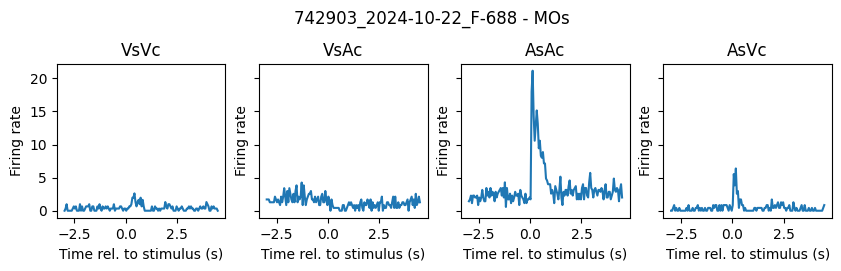

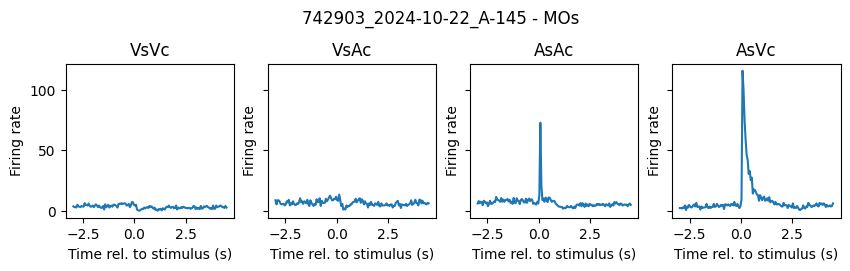

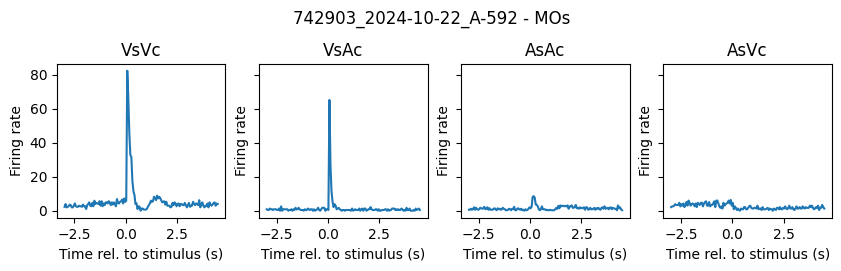

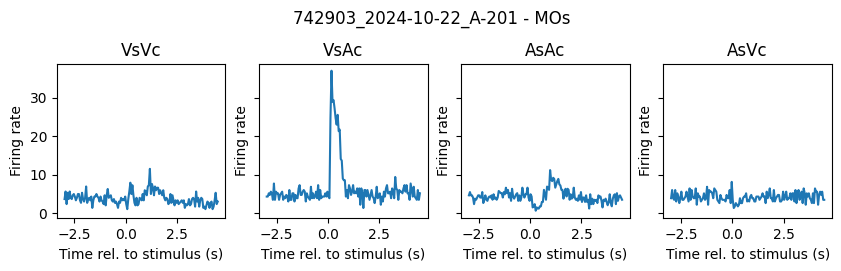

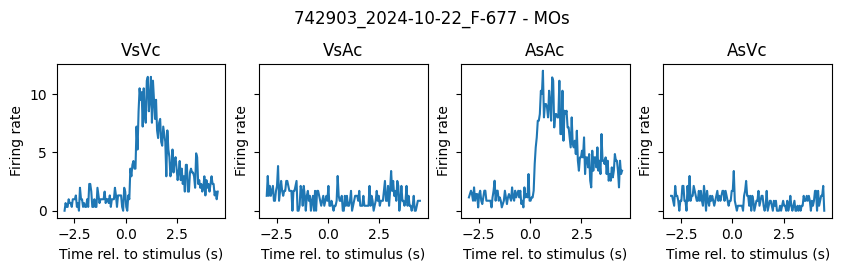

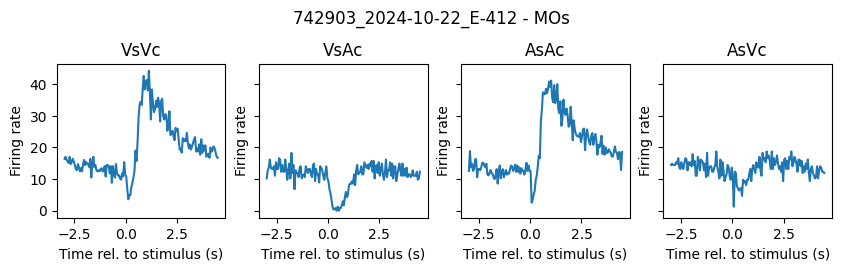

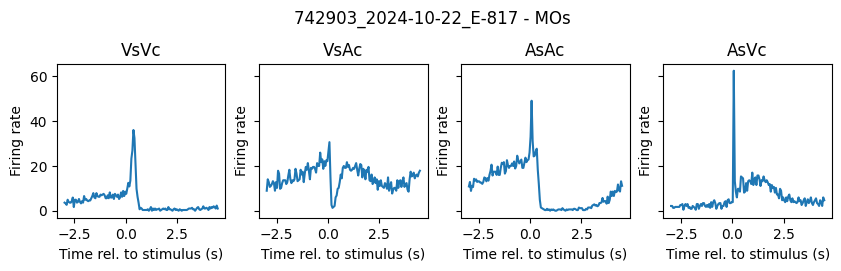

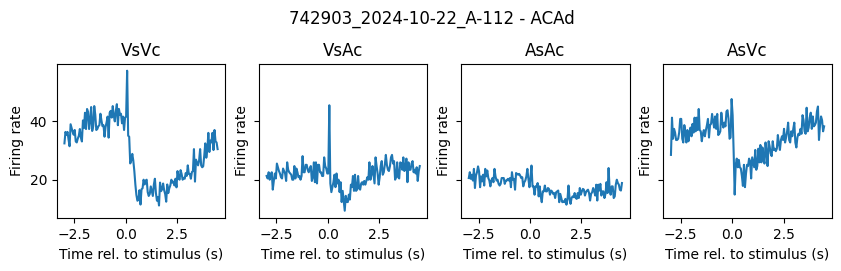

In [7]:
for unit_id in example_units:
    make_plot(unit_id,conditions)